<a href="https://colab.research.google.com/github/409410038/MISP_CTI_dataset/blob/main/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/aiforsec/CyNER.git

  Cloning https://github.com/aiforsec/CyNER.git to /tmp/pip-req-build-islobwgj
  Running command git clone --filter=blob:none --quiet https://github.com/aiforsec/CyNER.git /tmp/pip-req-build-islobwgj
  Resolved https://github.com/aiforsec/CyNER.git to commit 37aff53bd7235605638320e0c06de2fb82847070
  Preparing metadata (setup.py) ... done
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.8.1 requires click>=8.0, but you have click 7.1.2 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but y

In [ ]:
!pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.8.1 requires click>=8.0, but you have click 7.1.2 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
werkzeug 2.3.7 requires MarkupSafe>=2.1.1, but you have markupsa

In [ ]:
import cyner
import pandas as pd
import numpy as np
import logging
import gc
import torch
import matplotlib.pyplot as plt
import random
import time


In [ ]:
!pip show cyner

Name: cyner
Version: 0.0.1
Summary: Cybersecurity named entity recognition
Home-page: https://github.com/aiforsec/CyNER
Author: Tanvirul Alam
Author-email: tanvirul.alam@mail.rit.edu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiofiles, fastapi, flair, ipywidgets, jinja2, matplotlib, Pillow, segtok, sentencepiece, seqeval, spacy, spacy-transformers, sudachidict-core, sudachipy, tensorboard, toml, torch, transformers, uvicorn
Required-by: 


In [ ]:
logging.getLogger().setLevel(logging.INFO)
logging.debug('debug message')
logging.info('info message')
logging.warning('warning message')
logging.error('error message')
logging.critical('critical message')
random.seed(time.time())
random_seed = random.randint(-100000, 100000)
random_seed = 26352
print(random_seed)

INFO:root:info message
ERROR:root:error message
CRITICAL:root:critical message


26352


In [ ]:
logging.info('test')
cfg = {'checkpoint_dir': '/content/.ckpt13',
        'dataset': "/content",
        'model': 'xlm-roberta-base',
        'batch_size': 32,
        'lr': 1e-5,
        'epochs': 80,
        'random_seed': random_seed,
        'weight_decay': 1e-2,
        'max_seq_length': 128}


INFO:root:test


In [ ]:
gc.collect()
torch.cuda.empty_cache()

INFO:root:*** initialize network ***
INFO:root:create new checkpoint
INFO:root:checkpoint: /content/.ckpt13
INFO:root: - [arg] dataset: /content
INFO:root: - [arg] transformers_model: xlm-roberta-base
INFO:root: - [arg] random_seed: 26352
INFO:root: - [arg] lr: 1e-05
INFO:root: - [arg] epochs: 80
INFO:root: - [arg] warmup_step: 0
INFO:root: - [arg] weight_decay: 0.01
INFO:root: - [arg] batch_size: 32
INFO:root: - [arg] max_seq_length: 128
INFO:root: - [arg] fp16: False
INFO:root: - [arg] max_grad_norm: 1
INFO:root: - [arg] lower_case: False
INFO:root:target dataset: ['/content']
INFO:root:data_name: /content
INFO:root:formatting custom dataset from /content
INFO:root:found following files: {'valid': 'valid.txt', 'test': 'test.txt', 'train': 'train.txt'}
INFO:root:note that files should be named as either `valid.txt`, `test.txt`, or `train.txt` 
INFO:root:dataset /content/valid.txt: 176 entries
INFO:root:dataset /content/test.txt: 178 entries
INFO:root:dataset /content/train.txt: 1599 e

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:root:running on 1 GPUs
INFO:root:*** start training from step 0, epoch 1 ***


custom script


INFO:root:[epoch 1] * (training step 0) loss: 3.36511397, lr: 0.00001000
INFO:root:[epoch 1] (train) 
                precision    recall  f1-score   support

  Application       0.01      0.00      0.00       487
    Indicator       0.00      0.01      0.00       176
      Malware       0.10      0.00      0.01       208
     Protocol       0.00      0.00      0.00        58
     Reporter       0.00      0.12      0.01        84
         TTPs       0.00      0.00      0.00       761
  ThreatActor       0.00      0.00      0.00        60
Vulnerability       0.00      0.00      0.00       177

    micro avg       0.00      0.01      0.00      2011
    macro avg       0.01      0.02      0.00      2011
 weighted avg       0.01      0.01      0.00      2011

INFO:root:f1 score: 0.3406768112650465
INFO:root:recall: 0.7458975634012929
INFO:root:precision: 0.22075055187637968
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision is ill-defined an

show loss figure


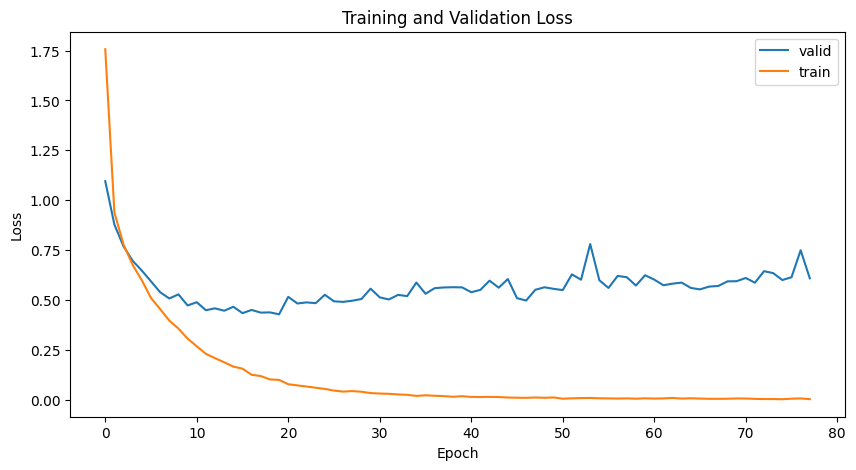

show score figure


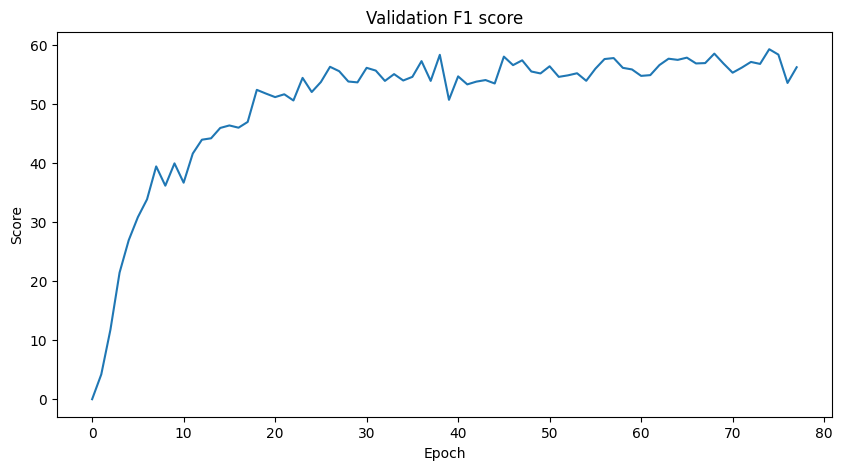

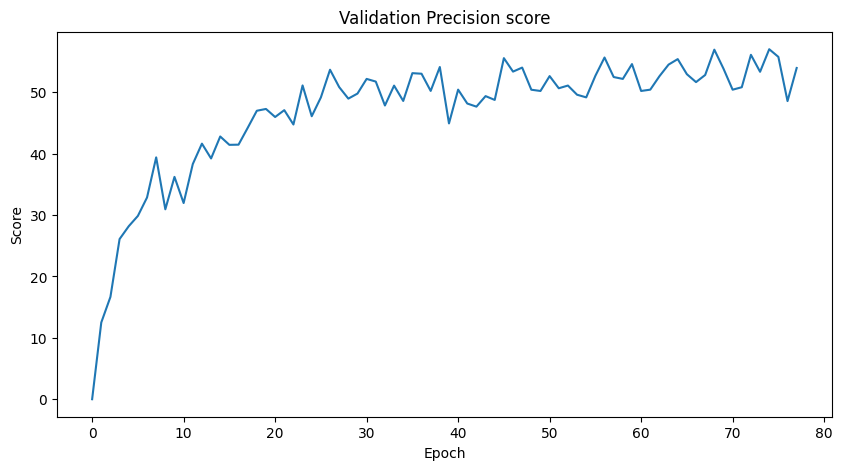

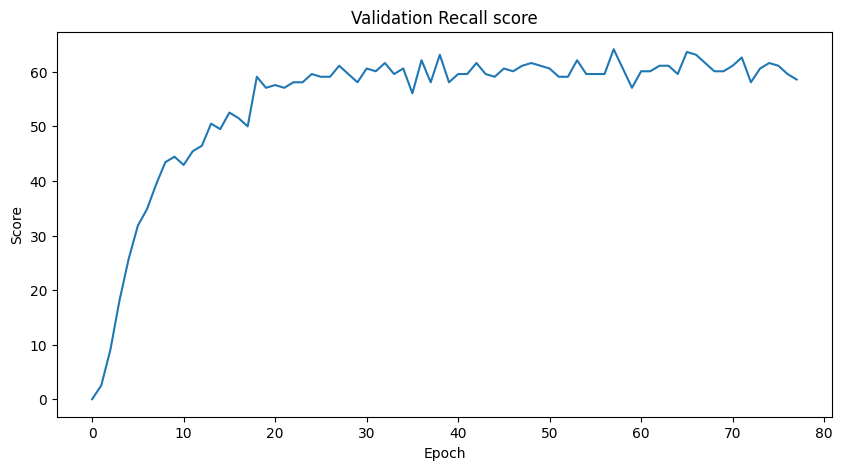

INFO:root:[epoch 79] (test) 
                precision    recall  f1-score   support

  Application       0.75      0.76      0.75        54
    Indicator       0.71      0.77      0.74        22
      Malware       0.75      0.86      0.80        14
     Protocol       0.25      0.17      0.20         6
     Reporter       0.75      0.75      0.75         8
         TTPs       0.50      0.63      0.56        86
  ThreatActor       0.56      0.83      0.67         6
Vulnerability       0.50      0.62      0.55        21

    micro avg       0.60      0.69      0.64       217
    macro avg       0.60      0.67      0.63       217
 weighted avg       0.60      0.69      0.64       217

INFO:root:f1 score: 63.94849785407726
INFO:root:recall: 68.66359447004609
INFO:root:precision: 59.83935742971887
INFO:root:ckpt saved at /content/.ckpt13


In [ ]:
model = cyner.TransformersNER(cfg)
model.train()

In [ ]:
import importlib
importlib.reload(cyner)
import cyner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = cyner.CyNER(transformer_model='/content/.ckpt1', use_heuristic=False, flair_model=None)

In [ ]:
#text = 'Barni master_ip_camera01 Information Disclosure Vulnerability'
text = 'Initial vector starts with the delivery of emails with an HTML attachment. Analysis is difficult because of different senders, attachment names, attachment hashes and subjects. Emails are part of replies of real communications. The HTML file contains an embedded picture with a password and an ISO file which is stored in the download folder. With opening the ISO image the password must be typed in and the ISO file will be mounted. On the mounted drive there is a shortcut (LNK) file which starts further attack steps using a Javascript file with wscript.exe. There is a hidden folder which contains the malicious files (Javascript, batch and database file). On later steps the malware tries to connect to Command&Control servers . The known IP addresses are added to the MISP event'
entities = model.get_entities(text)

for e in entities:
    print(e)

[(0, 74), (75, 176), (177, 227), (228, 342), (343, 433), (434, 561), (562, 660), (661, 733), (734, 784)]
(0, 74)
Initial vector starts with the delivery of emails with an HTML attachment.
(75, 176)
Analysis is difficult because of different senders, attachment names, attachment hashes and subjects.
(177, 227)
Emails are part of replies of real communications.
(228, 342)
The HTML file contains an embedded picture with a password and an ISO file which is stored in the download folder.
(343, 433)
With opening the ISO image the password must be typed in and the ISO file will be mounted.
(434, 561)
On the mounted drive there is a shortcut (LNK) file which starts further attack steps using a Javascript file with wscript.exe.
(562, 660)
There is a hidden folder which contains the malicious files (Javascript, batch and database file).
(661, 733)
On later steps the malware tries to connect to Command&Control servers .
(734, 784)
The known IP addresses are added to the MISP event
Mention: of ema

In [ ]:
fd = open('/content/plainvalid.txt', mode='r', encoding='utf-8')
sentences = fd.read().split('\n')
for i in range(len(sentences)):
    entities = model.get_entities(sentences[i])
    for e in entities:
        print(e)

INFO:root:*** initialize network ***


[(0, 23)]
(0, 23)
From title: Please wait
[(0, 316)]
(0, 316)
Address:	1AVNM68gj6PGPFcJuftKATa4WLnzg8fpfvBalance:	0.0001185800 BTC (+0.0001185800 BTC / -0.0000000000 BTC)Transactions:	1	 (previewing up to 5 most recent)======================================================================================#1	14 Jan 2022 14:01:25 UTC	 0.00011858 BTC       5.11 USD	      4.48 EUR
Mention: 1AVNM68gj6PGPFcJuftKATa4WLnzg8fpf, Class: Indicator, Start: 9, End: 42, Confidence: 0.77
Mention: 0.0001185800, Class: Indicator, Start: 52, End: 64, Confidence: 0.58
Mention: 0.0001185800, Class: Indicator, Start: 71, End: 83, Confidence: 0.70
Mention: 0.000000, Class: Indicator, Start: 91, End: 99, Confidence: 0.52
[(0, 74)]
(0, 74)
cmd.exe /Q /c start c:\stage1.exe 1> \\127.0.0.1\ADMIN$\__[TIMESTAMP] 2>&1
Mention: cmd.exe, Class: Application, Start: 0, End: 7, Confidence: 0.85
Mention: c:\s, Class: Indicator, Start: 20, End: 24, Confidence: 0.86
Mention: tage, Class: Application, Start: 24, End: 28, Co

KeyboardInterrupt: ignored